## Exlorative Data Analysis

This notebook aims at gaining a better understanding of the type of data we are working with.

### Import Libraries

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /users/eleves-a/2024/tim-
[nltk_data]     luka.horstmann.m2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /users/eleves-a/2024/tim-
[nltk_data]     luka.horstmann.m2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Training Data

In [8]:
# Define the directory containing the training files
training_dir = "/Data/tlh45/challenge_data/train_tweets"

# Function to load all CSV files into a single DataFrame
def load_training_data(directory):
    all_data = []
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load the data
df_original = load_training_data(training_dir)

  0%|          | 0/16 [00:00<?, ?it/s]

In [9]:
df = df_original.copy()
display(df.head())

df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Year'] = df['Datetime'].dt.year
df['Date'] = df['Datetime'].dt.date

df.head()

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,11_0,11,0,0,1404575400000,RT @2014WorIdCup: Argentina vs Belgium\n\nWho ...
1,11_0,11,0,0,1404575400000,@elijahman_ time to focus on Belgium winning t...
2,11_0,11,0,0,1404575400000,RT @FIFAWorldCup: GLOBAL STADIUM: #Joinin with...
3,11_0,11,0,0,1404575400000,RT @CatholicNewsSvc: #PopeFrancis. Uh-oh. Arge...
4,11_0,11,0,0,1404575400000,RT @soccerdotcom: If he scores vs #BEL we'll a...


,ID,MatchID,PeriodID,EventType,Timestamp,Tweet,Datetime,Year,Date
0,11_0,11,0,0,1404575400000,RT @2014WorIdCup: Argentina vs Belgium\n\nWho ...,2014-07-05 15:50:00,2014,2014-07-05
1,11_0,11,0,0,1404575400000,@elijahman_ time to focus on Belgium winning t...,2014-07-05 15:50:00,2014,2014-07-05
2,11_0,11,0,0,1404575400000,RT @FIFAWorldCup: GLOBAL STADIUM: #Joinin with...,2014-07-05 15:50:00,2014,2014-07-05
3,11_0,11,0,0,1404575400000,RT @CatholicNewsSvc: #PopeFrancis. Uh-oh. Arge...,2014-07-05 15:50:00,2014,2014-07-05
4,11_0,11,0,0,1404575400000,RT @soccerdotcom: If he scores vs #BEL we'll a...,2014-07-05 15:50:00,2014,2014-07-05


In [10]:
print(df.info())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056050 entries, 0 to 5056049
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ID         object        
 1   MatchID    int64         
 2   PeriodID   int64         
 3   EventType  int64         
 4   Timestamp  int64         
 5   Tweet      object        
 6   Datetime   datetime64[ns]
 7   Year       int32         
 8   Date       object        
dtypes: datetime64[ns](1), int32(1), int64(4), object(3)
memory usage: 327.9+ MB
None


,MatchID,PeriodID,EventType,Timestamp,Datetime,Year
count,5.056050e+06,5.056050e+06,5.056050e+06,5.056050e+06,5056050,5.056050e+06
mean,7.353660e+00,7.566063e+01,5.646837e-01,1.402254e+12,2014-06-08 18:54:48.208645888,2.013932e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.276869e+12,2010-06-18 13:50:00,2.010000e+03
25%,3.000000e+00,3.800000e+01,0.000000e+00,1.403814e+12,2014-06-26 20:27:30.249999872,2.014000e+03
50%,5.000000e+00,7.600000e+01,1.000000e+00,1.404490e+12,2014-07-04 16:11:44,2.014000e+03
75%,1.100000e+01,1.120000e+02,1.000000e+00,1.404853e+12,2014-07-08 21:03:45,2.014000e+03
max,1.900000e+01,1.790000e+02,1.000000e+00,1.405288e+12,2014-07-13 21:50:00,2.014000e+03
std,5.318815e+00,4.385090e+01,4.957984e-01,1.647120e+10,NaN,5.162622e-01


Dataset shape: (5056050, 9)
Columns: Index(['ID', 'MatchID', 'PeriodID', 'EventType', 'Timestamp', 'Tweet',
       'Datetime', 'Year', 'Date'],
      dtype='object')
Missing values:
 ID           0
MatchID      0
PeriodID     0
EventType    0
Timestamp    0
Tweet        0
Datetime     0
Year         0
Date         0
dtype: int64
Class distribution:
 EventType
1    2855069
0    2200981
Name: count, dtype: int64


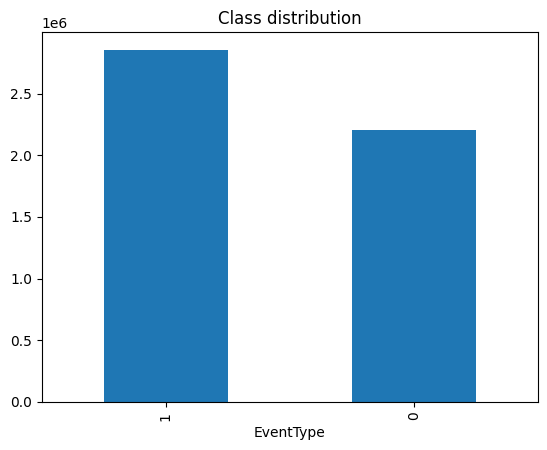

In [11]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df['EventType'].value_counts())

# Plot the class distribution
df['EventType'].value_counts().plot(kind='bar')
plt.title("Class distribution")
plt.show()

Dataset shape before removing duplicates: (5056050, 9)
Dataset shape after removing duplicates: (2819989, 9)
Number of removed duplicates: 2236061
Dataset shape before removing missing values: (2819989, 9)
Dataset shape after removing missing values: (2819989, 9)
Number of tweets: 2819989
Number of tweets after preprocessing: 1641873
Class distribution:
 EventType
1    981051
0    660822
Name: count, dtype: int64
Class distribution (%):
 EventType
1    59.751942
0    40.248058
Name: proportion, dtype: float64


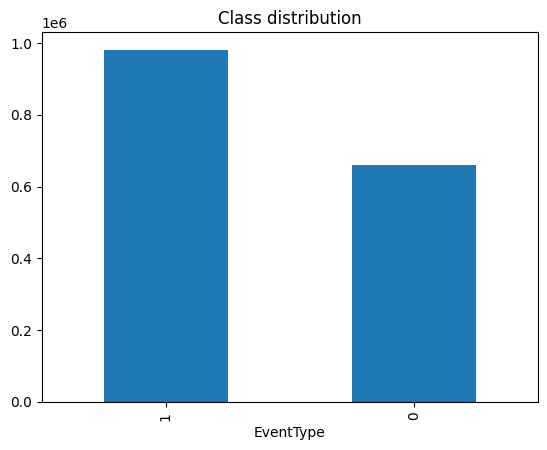

In [12]:
from preprocessor import Preprocessor
# Apply filters using the Preprocessor class
def filter_tweets(tweet):
    """
    Filters tweets based on predefined conditions using Preprocessor methods.
    Removes tweets that:
    - Contain a URL
    - Are retweets
    - Contain usernames
    """
    if Preprocessor.contains_url(tweet.lower()) or Preprocessor.is_retweet(tweet.lower()) or Preprocessor.contains_username(tweet.lower()):
        return None  # Exclude tweet
    return tweet  # Keep tweet

# remove duplicates
print("Dataset shape before removing duplicates:", df.shape)
df = df.drop_duplicates(subset=['Tweet'])
print("Dataset shape after removing duplicates:", df.shape)

# get number of removed duplicates
removed_duplicates = df_original.shape[0] - df.shape[0]
print("Number of removed duplicates:", removed_duplicates)

# remove missing values
print("Dataset shape before removing missing values:", df.shape)
df = df.dropna(subset=['Tweet'])
print("Dataset shape after removing missing values:", df.shape)

# get number of tweets at this stage
num_tweets = df.shape[0]
print("Number of tweets:", num_tweets)
# Apply preprocessing
df['Tweet'] = df['Tweet'].map(filter_tweets)

# Drop tweets that are None (e.g., removed due to mentions, URLs, or becoming empty)
df = df.dropna(subset=['Tweet']).reset_index(drop=True)

num_tweets = df.shape[0]
print("Number of tweets after preprocessing:", num_tweets)

# Plot the class distribution
print("Class distribution:\n", df['EventType'].value_counts())
# percentage distribution
print("Class distribution (%):\n", df['EventType'].value_counts(normalize=True) * 100)

df['EventType'].value_counts().plot(kind='bar')
plt.title("Class distribution")
plt.show()

Average number of tweets per ID: 768.3074403369209
Label distribution based on ID:
 EventType
1    1153
0     984
Name: count, dtype: int64
Label distribution based on ID (%):
 EventType
1    53.954141
0    46.045859
Name: count, dtype: float64


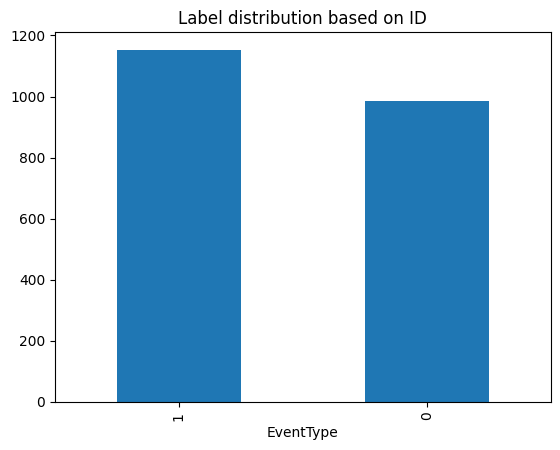

In [13]:
# group by ID and get average number of tweets per ID
average_tweets_per_id = df.groupby('ID').size().mean()
print("Average number of tweets per ID:", average_tweets_per_id)

# get label distribution again based on ID
label_distribution = df.groupby('ID')['EventType'].first().value_counts()
print("Label distribution based on ID:\n", label_distribution)

# get percentage distribution
print("Label distribution based on ID (%):\n", label_distribution / label_distribution.sum() * 100)

label_distribution.plot(kind='bar')
plt.title("Label distribution based on ID")
plt.show()

### Temporal analysis

Dates in 2010: [datetime.date(2010, 6, 18)]
Dates in 2014: [datetime.date(2014, 6, 18), datetime.date(2014, 6, 23), datetime.date(2014, 6, 25), datetime.date(2014, 6, 26), datetime.date(2014, 6, 30), datetime.date(2014, 7, 4), datetime.date(2014, 7, 5), datetime.date(2014, 7, 8), datetime.date(2014, 7, 13)]


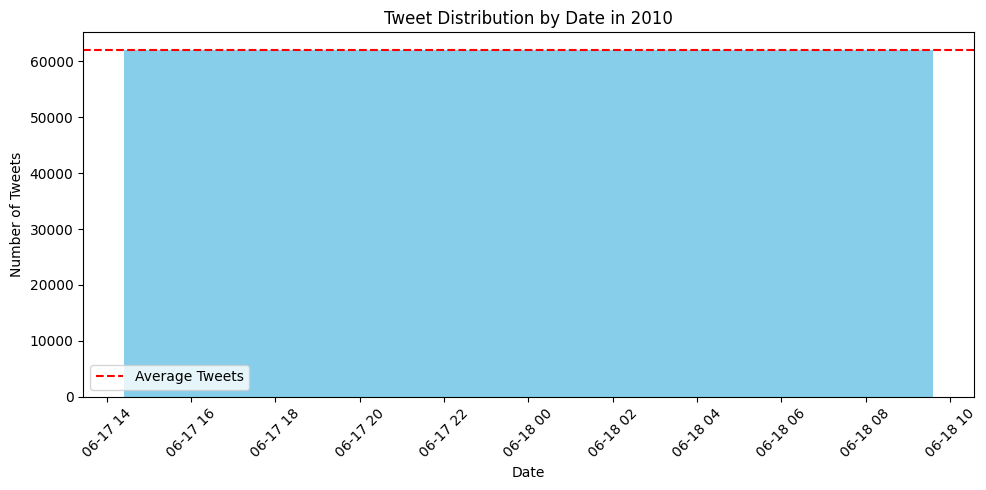

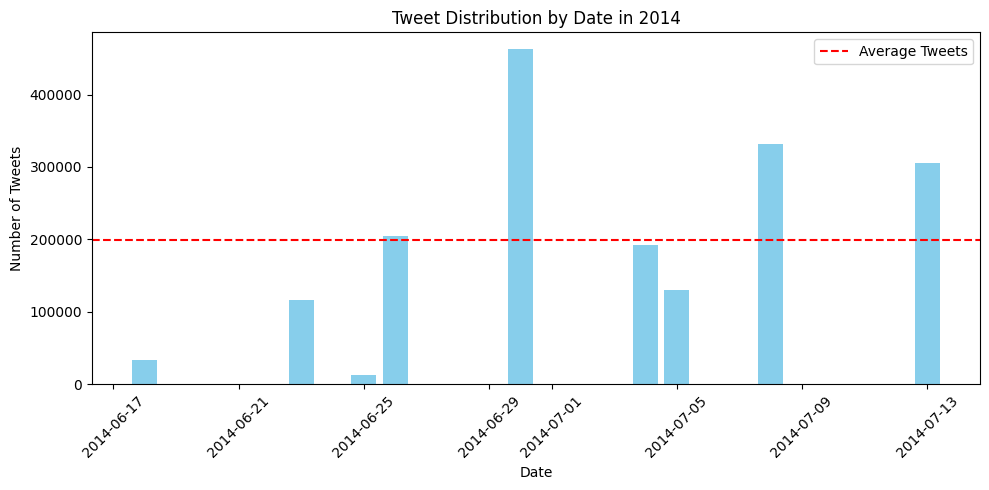

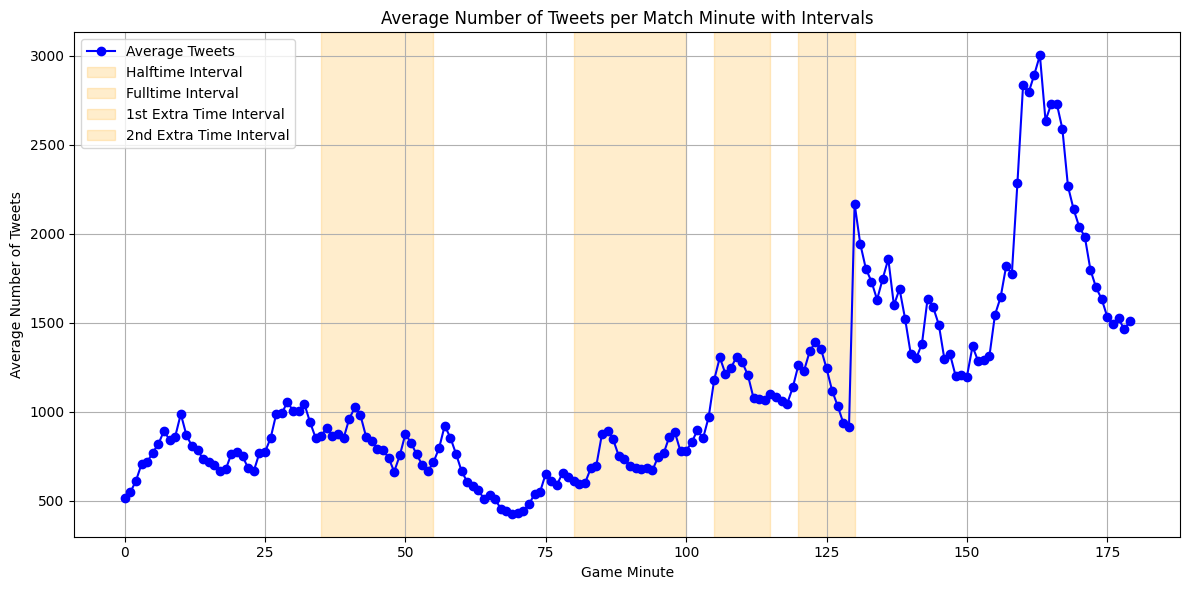

In [25]:
import matplotlib.pyplot as plt

# Analyze tweet distribution by year and date
def analyze_dates(df):
    # Check unique dates for each year
    for year in [2010, 2014]:
        year_dates = df[df['Year'] == year]['Date'].unique()
        print(f"Dates in {year}: {sorted(year_dates)}")

    # Plot tweet counts by date for each year
    tweet_counts_by_date = df.groupby(['Year', 'Date']).size().reset_index(name='TweetCount')
    for year in [2010, 2014]:
        year_data = tweet_counts_by_date[tweet_counts_by_date['Year'] == year]
        plt.figure(figsize=(10, 5))
        plt.bar(year_data['Date'], year_data['TweetCount'], color='skyblue')
        plt.title(f"Tweet Distribution by Date in {year}")
        plt.xlabel("Date")
        plt.ylabel("Number of Tweets")
        plt.xticks(rotation=45)
        plt.axhline(y=year_data['TweetCount'].mean(), color='red', linestyle='--', label='Average Tweets')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Analyze average tweets per match minute
def analyze_minutes(df):
    ## Extract minute of the game from PeriodID (assuming it represents minutes directly)
    df['GameMinute'] = df['PeriodID']

    # Group by MatchID and GameMinute to count tweets
    minute_tweets = df.groupby(['MatchID', 'GameMinute']).size().reset_index(name='TweetCount')

    # Average the number of tweets across matches for each game minute
    avg_tweets_per_minute = minute_tweets.groupby('GameMinute')['TweetCount'].mean()

    # Plot the average tweets per minute
    plt.figure(figsize=(12, 6))
    avg_tweets_per_minute.plot(kind='line', marker='o', color='blue', label='Average Tweets')

    # Define important intervals with ±10 minutes
    intervals = {
        "Halftime": (35, 55),
        "Fulltime": (80, 100),
        "1st Extra Time": (105, 115),
        "2nd Extra Time": (120, 130)
    }

    # Add shaded intervals
    for label, (start, end) in intervals.items():
        plt.axvspan(start, end, color='orange', alpha=0.2, label=f"{label} Interval")

    # Customize the plot
    plt.title("Average Number of Tweets per Match Minute with Intervals")
    plt.xlabel("Game Minute")
    plt.ylabel("Average Number of Tweets")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Perform the analyses
analyze_dates(df)
analyze_minutes(df)

### Look at the text:

Applying preprocessing to tweets...
Applying preprocessing to tweets...
Top 20 most common words:
 [('germany', 528836), ('worldcup', 356150), ('brazil', 241095), ('argentina', 179253), ('ger', 179216), ('france', 162580), ('win', 151395), ('algeria', 142052), ('game', 140832), ('goal', 134911), ('v', 129249), ('go', 122828), ('world', 100764), ('cup', 93935), ('ghana', 91336), ('belgium', 85600), ('like', 84605), ('portugal', 82317), ('im', 78102), ('score', 78086)]
Generating WordCloud...


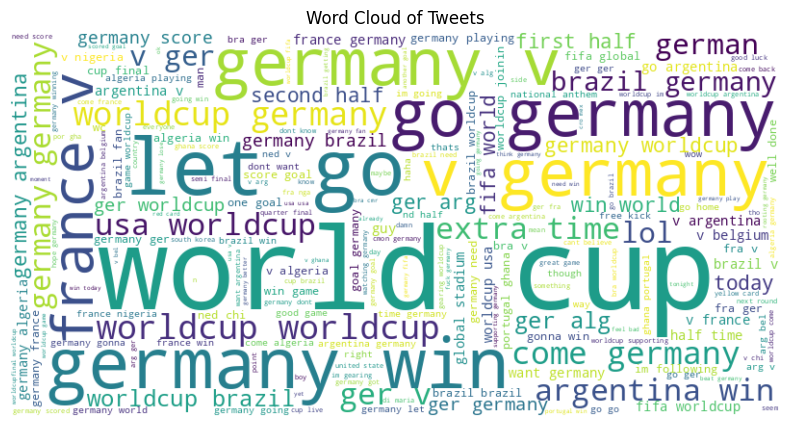

Plotting most frequent words...


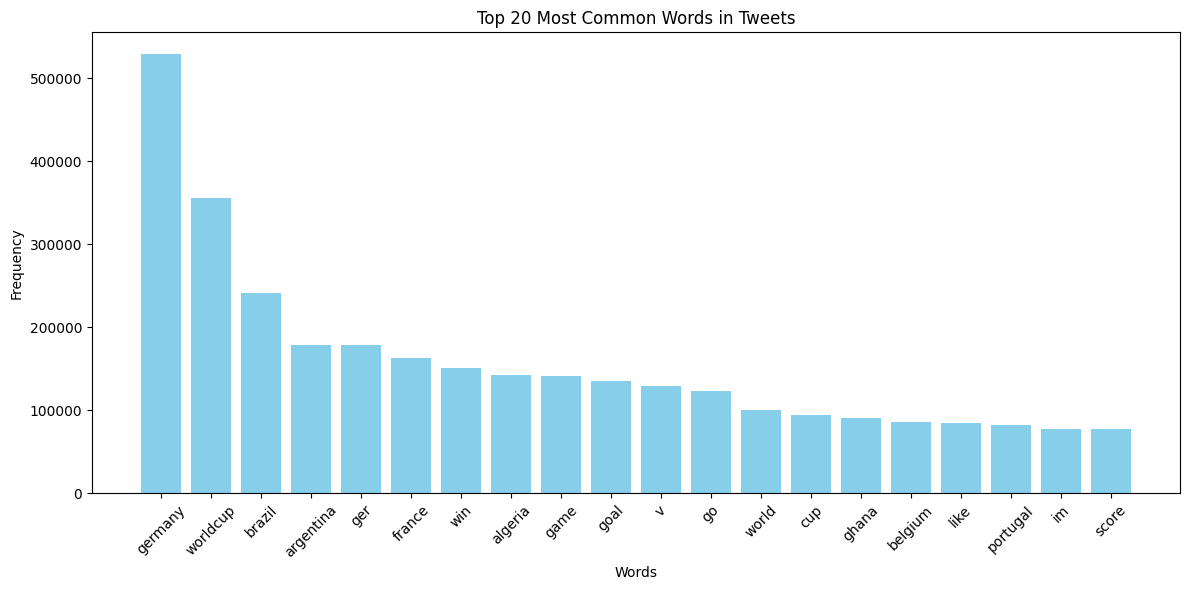

Analyzing hashtags...
Top 10 hashtags:
 []


In [26]:


# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenization
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the tweet column
print("Applying preprocessing to tweets...")
df['CleanedTweet'] = df['Tweet'].apply(preprocess_text)

# Exploratory functions
def explore_content(df):
    # Combine all preprocessed tweets into one large text
    all_text = ' '.join(df['CleanedTweet'])

    # Generate word frequency distribution
    print("Applying preprocessing to tweets...")
    word_freq = Counter(all_text.split())
    print("Top 20 most common words:\n", word_freq.most_common(20))

    # Create and display a WordCloud
    print("Generating WordCloud...")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Tweets")
    plt.show()

    # Plot most frequent words as a bar chart
    print("Plotting most frequent words...")
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top 20 Most Common Words in Tweets")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Hashtag analysis
    print("Analyzing hashtags...")
    hashtags = [word for tweet in df['Tweet'] for word in tweet.split() if word.startswith('#')]
    hashtag_freq = Counter(hashtags)
    print("Top 10 hashtags:\n", hashtag_freq.most_common(10))

    # Plot hashtag frequency
    most_common_hashtags = hashtag_freq.most_common(10)
    if most_common_hashtags:
        tags, tag_counts = zip(*most_common_hashtags)
        plt.figure(figsize=(12, 6))
        plt.bar(tags, tag_counts, color='orange')
        plt.title("Top 10 Hashtags")
        plt.xlabel("Hashtags")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Perform content exploration
explore_content(df)